# Proceso de EDA (Análisis preliminar de los datos)
## Consideraciones generales

Comenzamos con el proceso de explorar y comprender el conjunto de datasets principales brindados por Henry antes de realizar un análisis más profundo o modelado estadístico. El EDA tiene como objetivo principal obtener una comprensión inicial de los datos, identificar patrones, tendencias, relaciones, anomalías y posibles problemas de calidad de datos.

Algunas de las actividades que realizaremos para llevar a cabo el análisis preliminar de los datos incluye:

**Exploración de los datos**: Revisión de la estructura del conjunto de datos, como el número de filas y columnas, los tipos de datos de cada columna, y la presencia de valores faltantes o datos erróneos.

**Resumen estadístico**: Cálculo de estadísticas descriptivas básicas como la media, la mediana, la moda, la desviación estándar, el rango, etc., para entender la distribución y la dispersión de los datos.

**Visualización de datos**: Creación de gráficos y visualizaciones para representar los datos de manera efectiva, como histogramas, gráficos de barras, diagramas de caja, diagramas de dispersión, etc., para identificar patrones y relaciones entre las variables.

**Identificación de patrones y tendencias**: Buscar patrones, tendencias, correlaciones y relaciones entre las variables que puedan proporcionar información útil para análisis posteriores.

Limpieza de datos: Identificación y manejo de valores atípicos, valores faltantes, datos duplicados u otros problemas de calidad de datos que puedan afectar la validez de los análisis posteriores.

En resumen, lo que buscamos en este análisis preliminar de datos es una comprensión inicial de los datos y guiar el análisis y la modelización subsiguientes.


## Asignación carpeta virtual en Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Carga de datos

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ruta_colab = '/content/drive/MyDrive/Colab Notebooks/datasets'


In [8]:
# Lista de archivos en la carpeta "colab notebooks"
archivos_colab = os.listdir(ruta_colab)
print(archivos_colab)


['ElectricCarData_Clean.csv', 'ElectricCarData_Norm.csv', 'taxi_zones.dbf', 'taxi+_zone_lookup.csv', 'Vehicle Fuel Economy Data.csv', 'Alternative Fuel Vehicles US.csv', 'Light Duty Vehicles.csv', 'Electric and Alternative Fuel Charging Stations.csv']


## ElectricCarData_Clean

In [9]:
# Ruta completa del archivo CSV
archivo_csv = 'ElectricCarData_Clean.csv'
ruta_csv = os.path.join(ruta_colab, archivo_csv)

# Carga del archivo CSV en un DataFrame
df = pd.read_csv(ruta_csv)

# Visualiza los primeros registros del DataFrame
print(df.head())

         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0       450              161            940         Yes        AWD   
1       270              167            250         Yes        RWD   
2       400              181            620         Yes        AWD   
3       360              206            560         Yes        RWD   
4       170              168            190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [ ]:
print('Cantidad de filas: ')
print(len(df))

Cantidad de filas: 
103


In [ ]:
# Mostrar los valores nulos encontrados por columna
cantidad_nulos_por_columna = df.isnull().sum()
print(cantidad_nulos_por_columna)

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


In [ ]:
# Calcula la cantidad de datos duplicados
cantidad_duplicados_por_columna = df.duplicated().sum()
print(cantidad_duplicados_por_columna)

0


In [ ]:
# Outliers

columnas_numericas = df.select_dtypes(include=[np.number]).columns
Q1 = df[columnas_numericas].quantile(0.25)
Q3 = df[columnas_numericas].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[columnas_numericas] < (Q1 - 1.5 * IQR)) | (df[columnas_numericas] > (Q3 + 1.5 * IQR))).sum()

print(outliers)

AccelSec            1
TopSpeed_KmH        1
Range_Km            2
Efficiency_WhKm     7
Seats              32
PriceEuro           6
dtype: int64


In [ ]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [18]:
# Definimos un diccionario de mapeo para cambiar los nombres de las columnas de ingles a español

nombres_en_espanol = {
    'Brand': 'Marca',
    'Model': 'Modelo',
    'AccelSec': 'AceleracionSeg',
    'TopSpeed_KmH': 'VelMax_KmH',
    'Range_Km': 'Autonomia_Km',
    'Efficiency_WhKm': 'Eficiencia_WhKm',
    'FastCharge_KmH': 'CargaRapida_KmH',
    'RapidCharge': 'CargaRapida',
    'PowerTrain': 'TipoMotor',
    'PlugType': 'TipoEnchufe',
    'BodyStyle': 'EstiloCarroceria',
    'Segment': 'Segmento',
    'Seats': 'Asientos',
    'PriceEuro': 'PrecioEuro'
}

# Renombrar las columnas usando el diccionario de mapeo
df.rename(columns=nombres_en_espanol, inplace=True)

# Mostrar el DataFrame con los nombres de las columnas en español
print(df)

           Marca                           Modelo  AceleracionSeg  VelMax_KmH  \
0         Tesla     Model 3 Long Range Dual Motor             4.6         233   
1    Volkswagen                         ID.3 Pure            10.0         160   
2      Polestar                                 2             4.7         210   
3           BMW                              iX3              6.8         180   
4         Honda                                e              9.5         145   
..           ...                              ...             ...         ...   
98       Nissan                       Ariya 63kWh             7.5         160   
99         Audi     e-tron S Sportback 55 quattro             4.5         210   
100      Nissan               Ariya e-4ORCE 63kWh             5.9         200   
101      Nissan   Ariya e-4ORCE 87kWh Performance             5.1         200   
102       Byton                 M-Byte 95 kWh 2WD             7.5         190   

     Autonomia_Km  Eficienc

In [19]:
# Identificar valores atípicos en la columna 'Seats'
Q1_Seats = df['Asientos'].quantile(0.25)
Q3_Seats = df['Asientos'].quantile(0.75)
IQR_Seats = Q3_Seats - Q1_Seats

# Filtrar los valores atípicos
outliers_Seats = df[(df['Asientos'] < (Q1_Seats - 1.5 * IQR_Seats)) | (df['Asientos'] > (Q3_Seats + 1.5 * IQR_Seats))]

# Mostrar los valores atípicos
print(outliers_Seats)


          Marca                          Modelo  AceleracionSeg  VelMax_KmH  \
4        Honda                               e              9.5         145   
15  Volkswagen                       ID.3 Pro S             7.9         160   
16     Porsche                   Taycan Turbo S             2.8         260   
17  Volkswagen                           e-Up!             11.9         130   
19        Mini                       Cooper SE              7.3         150   
21       Tesla    Model Y Long Range Dual Motor             5.1         217   
23        Audi                       e-tron GT              3.5         240   
28         BMW                        i3 120 Ah             7.3         150   
33       Tesla             Cybertruck Tri Motor             3.0         210   
37       CUPRA                         el-Born              6.5         160   
43       Skoda                      CITIGOe iV             12.3         130   
44        SEAT                    Mii Electric      

<ipython-input-20-a650b036bd02>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EstiloCarroceria', y='Asientos', data=df, palette='viridis')


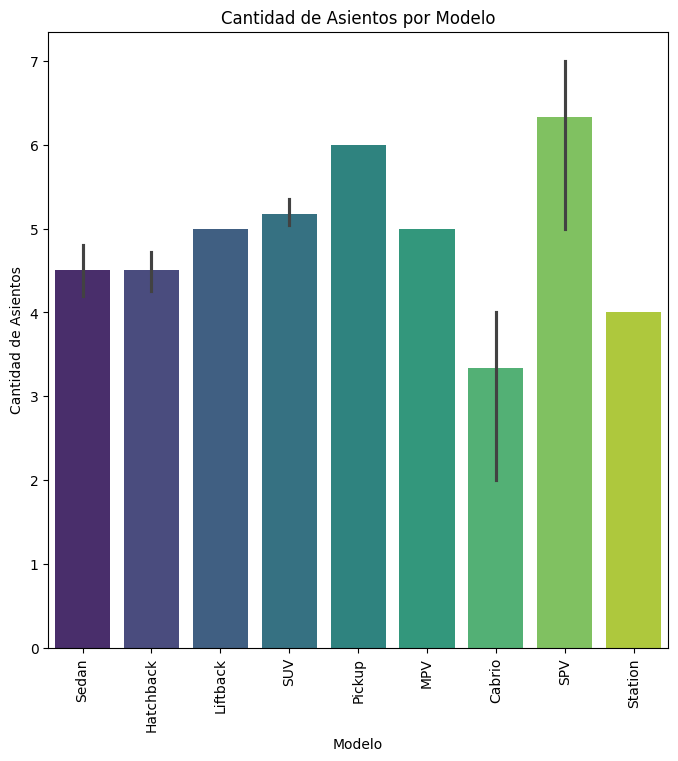

In [20]:
# Podemos observar que la columna asientos es la que más outliers posee, analicemos con más detalle

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras vertical para la cantidad de asientos por modelo
plt.figure(figsize=(8, 8))
sns.barplot(x='EstiloCarroceria', y='Asientos', data=df, palette='viridis')
plt.title('Cantidad de Asientos por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Cantidad de Asientos')
plt.xticks(rotation=90)  # Rotar los nombres de los modelos para mejor visualización
plt.show()


<ipython-input-16-bedee3465811>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


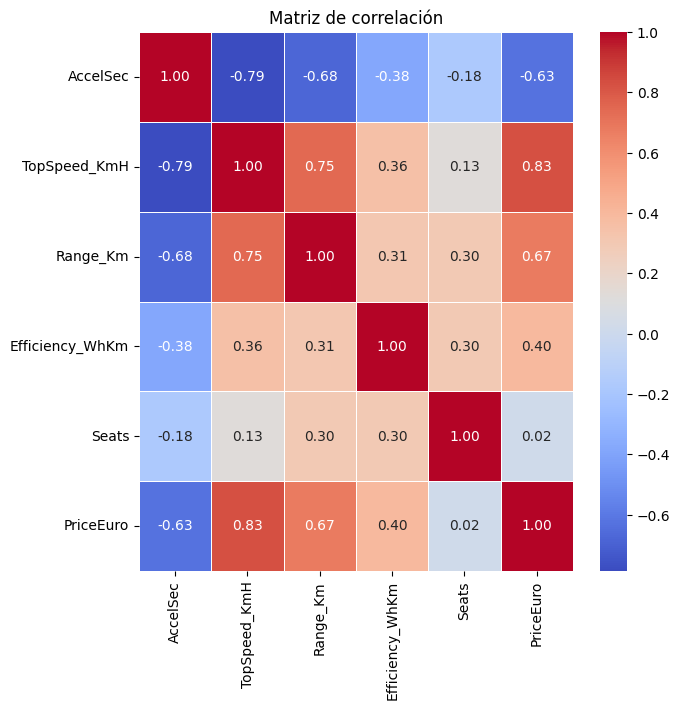

In [16]:
# Analizamos relación entre variables mediante una matriz de correlación
# Calcular la matriz de correlación
matriz_correlacion = df.corr()

# Crear un mapa de calor usando Seaborn
plt.figure(figsize=(7, 7))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación')
plt.show()


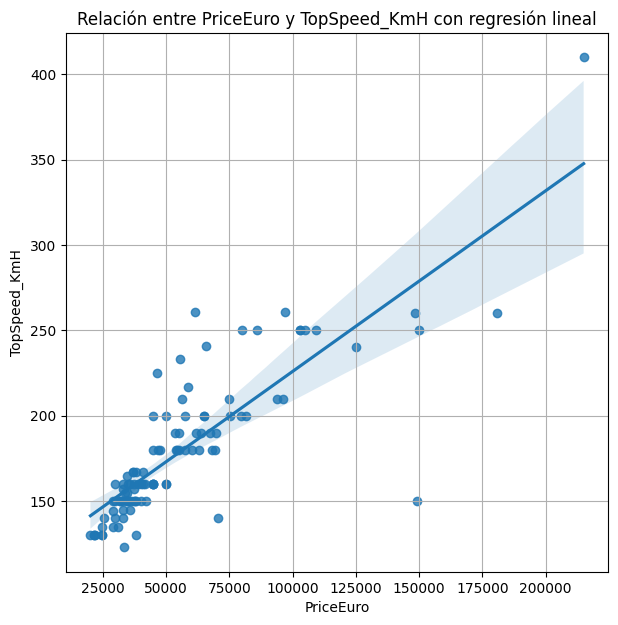

In [15]:
# Podemos observar una fuerte correlación entre las variables PriceEuro y TopSpeed, observemos con más detalle:

# Graficar la relación entre PriceEuro y TopSpeed_KmH con una línea de regresión
plt.figure(figsize=(7, 7))
sns.regplot(x='PriceEuro', y='TopSpeed_KmH', data=df)
plt.title('Relación entre PriceEuro y TopSpeed_KmH con regresión lineal')
plt.xlabel('PriceEuro')
plt.ylabel('TopSpeed_KmH')
plt.grid(True)
plt.show()


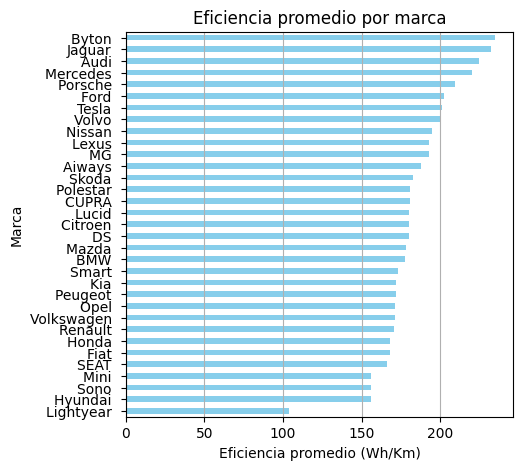

In [13]:
# Un dato relevante sería la marca más eficiente en términos de consumo de energía por kilómetro recorrido.

import matplotlib.pyplot as plt

# Calcular el promedio de Efficiency_WhKm para cada marca y ordenar de menor a mayor eficiencia
efficiency_by_brand = df.groupby('Brand')['Efficiency_WhKm'].mean().sort_values()

# Graficar el promedio de Efficiency_WhKm por marca
plt.figure(figsize=(5, 5))
efficiency_by_brand.plot(kind='barh', color='skyblue')
plt.title('Eficiencia promedio por marca')
plt.xlabel('Eficiencia promedio (Wh/Km)')
plt.ylabel('Marca')
plt.grid(axis='x')
plt.show()

# Si bien es contrario a la intuición en términos de valores numéricos más bajos, en el contexto de la eficiencia, un valor menor indica un mejor rendimiento.
# Por lo tanto, al observar los datos, la marca "Lightear" sería considerada más eficiente que la marca "Byton".







## ElectricCarData_Norm.csv


In [ ]:
# Ruta completa del archivo CSV
archivo_csv_2 = 'ElectricCarData_Norm.csv'
ruta_csv_2 = os.path.join(ruta_colab, archivo_csv_2)

# Carga del archivo CSV en un DataFrame
df_2 = pd.read_csv(ruta_csv)

# Visualiza los primeros registros del DataFrame
print(df_2.head())

         Brand                          Model     Accel  TopSpeed   Range  \
0       Tesla   Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1  Volkswagen                       ID.3 Pure  10.0 sec  160 km/h  270 km   
2    Polestar                               2   4.7 sec  210 km/h  400 km   
3         BMW                            iX3    6.8 sec  180 km/h  360 km   
4       Honda                              e    9.5 sec  145 km/h  170 km   

  Efficiency FastCharge              RapidCharge        PowerTrain  \
0  161 Wh/km   940 km/h  Rapid charging possible   All Wheel Drive   
1  167 Wh/km   250 km/h  Rapid charging possible  Rear Wheel Drive   
2  181 Wh/km   620 km/h  Rapid charging possible   All Wheel Drive   
3  206 Wh/km   560 km/h  Rapid charging possible  Rear Wheel Drive   
4  168 Wh/km   190 km/h  Rapid charging possible  Rear Wheel Drive   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [ ]:
print('Cantidad de filas: ')
print(len(df_2))

Cantidad de filas: 
103


In [ ]:
# Mostrar los valores nulos encontrados por columna
cantidad_nulos_por_columna = df_2.isnull().sum()
print(cantidad_nulos_por_columna)

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64


In [ ]:
# Calcula la cantidad de datos duplicados
cantidad_duplicados_por_columna = df_2.duplicated().sum()
print(cantidad_duplicados_por_columna)

0


In [ ]:
# Outliers

columnas_numericas = df_2.select_dtypes(include=[np.number]).columns
Q1 = df_2[columnas_numericas].quantile(0.25)
Q3 = df_2[columnas_numericas].quantile(0.75)
IQR = Q3 - Q1
outlier = ((df_2[columnas_numericas] < (Q1 - 1.5 * IQR)) | (df_2[columnas_numericas] > (Q3 + 1.5 * IQR))).sum()
print(outlier)

Seats        32
PriceEuro     6
dtype: int64


In [ ]:
df_2.columns

Index(['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency',
       'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

Podemos observar que salvo unas pequeñas modificaciones en los nombres de las columnas y outliers los archivos 'ElectricaCarData_Clean' y 'ElectricCarData_Norm' contienen los mismos tipos de datos por lo que no es necesario un eda preliminar en base a este archivo, ya que se hizo en el anterior

## Electric and Alternative Fuel Charging Stations.csv

In [ ]:
# Ruta completa del archivo CSV
archivo_csv = 'Electric and Alternative Fuel Charging Stations.csv'
ruta_csv = os.path.join(ruta_colab, archivo_csv)

# Carga del archivo CSV en un DataFrame
df = pd.read_csv(ruta_csv)

# Visualiza los primeros registros del DataFrame
print(df.head())

<ipython-input-6-e2bedf39eb3e>:6: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)


  Fuel Type Code                                  Station Name  \
0            CNG          Spire - Montgomery Operations Center   
1            CNG                           PS Energy - Atlanta   
2            CNG  Metropolitan Atlanta Rapid Transit Authority   
3            CNG                         United Parcel Service   
4            CNG                    Arkansas Oklahoma Gas Corp   

         Street Address                            Intersection Directions  \
0      2951 Chestnut St                                                NaN   
1      340 Whitehall St  From I-7585 N, exit 91 to Central Ave, left on...   
2   2424 Piedmont Rd NE                                                NaN   
3  270 Marvin Miller Dr                                                NaN   
4     2100 S Waldron Rd                                                NaN   

         City State    ZIP  Plus4 Station Phone Status Code  ...  \
0  Montgomery    AL  36107    NaN           NaN           E  ...  

Se advierte que hay columnas que poseen diferentes tipos de datos en la misma.

In [ ]:
# Selección de columnas de interés
columnas_deseadas = ['Fuel Type Code', 'Station Name', 'Street Address', 'City', 'Groups With Access Code', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Network', 'Geocode Status', 'Latitude', 'Longitude', 'ID', 'Open Date', 'EV Pricing', 'Restricted Access']
df = df.loc[:, columnas_deseadas]
# Visualiza los primeros registros del DataFrame
print(df.head())

  Fuel Type Code                                  Station Name  \
0            CNG          Spire - Montgomery Operations Center   
1            CNG                           PS Energy - Atlanta   
2            CNG  Metropolitan Atlanta Rapid Transit Authority   
3            CNG                         United Parcel Service   
4            CNG                    Arkansas Oklahoma Gas Corp   

         Street Address        City            Groups With Access Code  \
0      2951 Chestnut St  Montgomery                            Private   
1      340 Whitehall St     Atlanta     Public - Card key at all times   
2   2424 Piedmont Rd NE     Atlanta          Private - Government only   
3  270 Marvin Miller Dr     Atlanta                            Private   
4     2100 S Waldron Rd  Fort Smith  Public - Credit card at all times   

   EV Level2 EVSE Num  EV DC Fast Count EV Network Geocode Status   Latitude  \
0                 NaN               NaN        NaN          200-9  32.367916  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           70406 non-null  object 
 1   Station Name             70406 non-null  object 
 2   Street Address           70405 non-null  object 
 3   City                     70406 non-null  object 
 4   Groups With Access Code  70406 non-null  object 
 5   EV Level2 EVSE Num       54144 non-null  float64
 6   EV DC Fast Count         8307 non-null   float64
 7   EV Network               60907 non-null  object 
 8   Geocode Status           70391 non-null  object 
 9   Latitude                 70406 non-null  float64
 10  Longitude                70406 non-null  float64
 11  ID                       70406 non-null  int64  
 12  Open Date                69310 non-null  object 
 13  EV Pricing               16961 non-null  object 
 14  Restricted Access     

In [ ]:
# Tipos de datos
tipos_de_datos = df.dtypes
print("Tipos de datos:")
print(tipos_de_datos)

# Valores faltantes
valores_faltantes = df.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

# Nulos
nulos = df.isna().sum()
print("\nNulos por columna:")
print(nulos)

# Duplicados
duplicados = df[df.duplicated()]
print("Cantidad de registros duplicados:", len(duplicados))


Tipos de datos:
Fuel Type Code              object
Station Name                object
Street Address              object
City                        object
Groups With Access Code     object
EV Level2 EVSE Num         float64
EV DC Fast Count           float64
EV Network                  object
Geocode Status              object
Latitude                   float64
Longitude                  float64
ID                           int64
Open Date                   object
EV Pricing                  object
Restricted Access           object
dtype: object
Valores faltantes por columna:
Fuel Type Code                 0
Station Name                   0
Street Address                 1
City                           0
Groups With Access Code        0
EV Level2 EVSE Num         16262
EV DC Fast Count           62099
EV Network                  9499
Geocode Status                15
Latitude                       0
Longitude                      0
ID                             0
Open Date         

<ipython-input-16-f6b1aefe4daa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de dato', y='Cantidad', data=tipos_de_datos_count, palette='viridis')


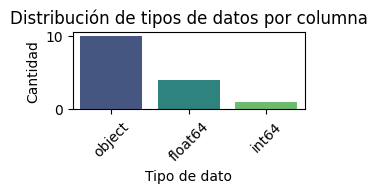

In [ ]:
# Crear un DataFrame que contenga los tipos de datos por columna
tipos_de_datos_df = df.dtypes.reset_index()
tipos_de_datos_df.columns = ['Columna', 'Tipo de dato']

# Contar la cantidad de veces que aparece cada tipo de dato
tipos_de_datos_count = tipos_de_datos_df['Tipo de dato'].value_counts().reset_index()
tipos_de_datos_count.columns = ['Tipo de dato', 'Cantidad']

# Crear el gráfico de barras
plt.figure(figsize=(3, 1))
sns.barplot(x='Tipo de dato', y='Cantidad', data=tipos_de_datos_count, palette='viridis')
plt.title('Distribución de tipos de datos por columna')
plt.xlabel('Tipo de dato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

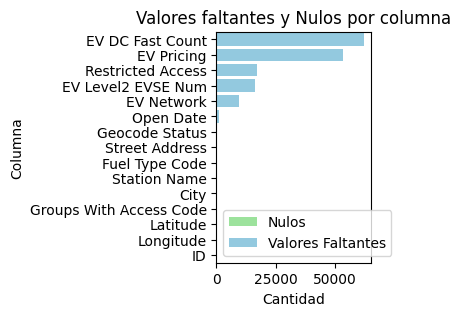

In [ ]:
# Combinar la información de valores faltantes y nulos en un solo DataFrame
resumen_nulos = pd.DataFrame({'Columna': valores_faltantes.index, 'Valores Faltantes': valores_faltantes.values, 'Nulos': nulos.values})

# Ordenar el DataFrame por la cantidad de nulos
resumen_nulos = resumen_nulos.sort_values(by='Nulos', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(2, 3))
sns.barplot(x='Nulos', y='Columna', data=resumen_nulos, color='lightgreen', label='Nulos')
sns.barplot(x='Valores Faltantes', y='Columna', data=resumen_nulos, color='skyblue', label='Valores Faltantes')

# Establecer etiquetas y título
plt.title('Valores faltantes y Nulos por columna')
plt.xlabel('Cantidad')
plt.legend()

plt.show()

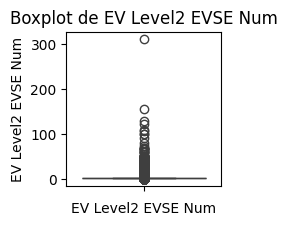

In [ ]:
# Boxplot de 'EV Level2 EVSE Num'
plt.figure(figsize=(2, 2))
sns.boxplot(data=df['EV Level2 EVSE Num'])
plt.title('Boxplot de EV Level2 EVSE Num')
plt.xlabel('EV Level2 EVSE Num')
plt.show()

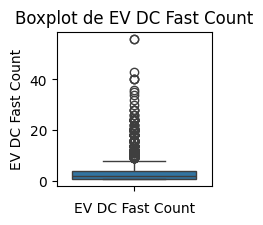

In [ ]:
# Boxplot de 'EV DC Fast Count'
plt.figure(figsize=(2, 2))
sns.boxplot(data=df['EV DC Fast Count'])
plt.title('Boxplot de EV DC Fast Count')
plt.xlabel('EV DC Fast Count')
plt.show()

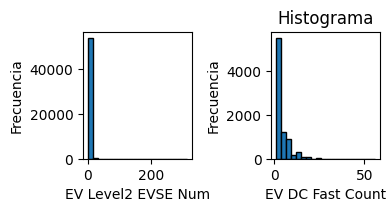

In [ ]:
# Histograma de columnas numéricas
columnas_num = ['EV Level2 EVSE Num', 'EV DC Fast Count']
plt.figure(figsize=(4, 2))
for i, columna in enumerate(columnas_num):
    plt.subplot(1, len(columnas_num), i+1)
    plt.hist(df[columna], bins=20, edgecolor='black')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.title('Histograma')
plt.show()

## Light Duty Vehicles

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import display
from sqlalchemy import create_engine
import numpy as np


In [ ]:
# Ruta completa del archivo CSV
archivo_csv3 = 'Light Duty Vehicles.csv'
ruta3_csv = os.path.join(ruta_colab, archivo_csv3)

# Carga del archivo CSV en un DataFrame
df_ligeros = pd.read_csv(ruta_csv)

# Visualiza los primeros registros del DataFrame
print(df_ligeros.head())

In [3]:
df_ligeros

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,...,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,656,3,1.0,225,9,Ram Van B250,1992,NaN,NaN,NaN,...,http://www.dodge.com,Van,CNG,CNG - Compressed Natural Gas,Dedicated,NaN,NaN,NaN,NaN,NaN
3004,660,49,5.0,225,27,Spirit FFV,1992,NaN,NaN,NaN,...,http://www.dodge.com,Sedan/Wagon,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN
3005,658,49,5.0,219,9,Econoline-Fleet Demo FFV,1992,NaN,NaN,NaN,...,https://www.ford.com,Van,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN
3006,650,49,5.0,215,27,Lumina FFV,1991,NaN,NaN,NaN,...,http://www.chevrolet.com,Sedan/Wagon,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN


In [4]:
#informacion de los datos
df_ligeros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle ID                          3008 non-null   int64  
 1   Fuel ID                             3008 non-null   int64  
 2   Fuel Configuration ID               2973 non-null   float64
 3   Manufacturer ID                     3008 non-null   int64  
 4   Category ID                         3008 non-null   int64  
 5   Model                               3008 non-null   object 
 6   Model Year                          3008 non-null   int64  
 7   Alternative Fuel Economy City       1595 non-null   float64
 8   Alternative Fuel Economy Highway    1505 non-null   float64
 9   Alternative Fuel Economy Combined   467 non-null    float64
 10  Conventional Fuel Economy City      2044 non-null   float64
 11  Conventional Fuel Economy Highway   2046 no

In [5]:
#Realizamos una prevista sobre caracteristicas de los datos
df_ligeros.describe()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Cylinder Count,Electric-Only Range,PHEV Total Range
count,3008.00000,3008.000000,2973.000000,3008.000000,3008.000000,3008.000000,1595.000000,1505.000000,467.000000,2044.000000,2046.000000,763.000000,2443.000000,374.000000,43.000000
mean,9424.59242,31.003989,4.907164,255.855718,24.988697,2014.493019,38.439298,37.392651,72.126338,22.781605,27.443206,27.832241,6.085960,148.251337,450.465116
std,4667.98027,18.311570,3.263154,64.474477,6.021677,6.722191,47.778798,42.724296,36.776309,10.794132,10.123663,10.265666,1.762977,128.708353,93.042578
min,1.00000,3.000000,1.000000,209.000000,3.000000,1991.000000,0.000000,0.000000,10.000000,0.000000,0.000000,15.000000,0.000000,8.000000,290.000000
25%,10280.75000,11.000000,1.000000,215.000000,25.000000,2012.000000,11.000000,16.000000,49.000000,16.000000,21.000000,21.000000,4.000000,21.000000,380.000000
50%,11560.50000,41.000000,5.000000,221.000000,27.000000,2016.000000,14.000000,20.000000,74.000000,19.000000,26.000000,24.000000,6.000000,126.000000,460.000000
75%,12336.25000,45.000000,9.000000,243.000000,29.000000,2020.000000,60.000000,41.000000,103.500000,26.000000,31.000000,31.000000,8.000000,254.750000,520.000000
max,13105.00000,57.000000,9.000000,470.000000,29.000000,2022.000000,800.000000,800.000000,142.000000,66.000000,231.000000,59.000000,12.000000,520.000000,640.000000


In [6]:
#verificación de duplicados en la ID vehiculos
df_ligeros.duplicated('Vehicle ID').sum()

0

In [8]:
df_ligeros.duplicated('Fuel ID').sum()

2997

In [9]:
#Buscamos valores nulos 
df_ligeros.isnull().sum()

Vehicle ID                               0
Fuel ID                                  0
Fuel Configuration ID                   35
Manufacturer ID                          0
Category ID                              0
Model                                    0
Model Year                               0
Alternative Fuel Economy City         1413
Alternative Fuel Economy Highway      1503
Alternative Fuel Economy Combined     2541
Conventional Fuel Economy City         964
Conventional Fuel Economy Highway      962
Conventional Fuel Economy Combined    2245
Transmission Type                       84
Engine Type                            797
Engine Size                            134
Engine Cylinder Count                  565
Engine Description                    1037
Manufacturer                             0
Manufacturer URL                       164
Category                                 0
Fuel Code                                0
Fuel                                     0
Fuel Config

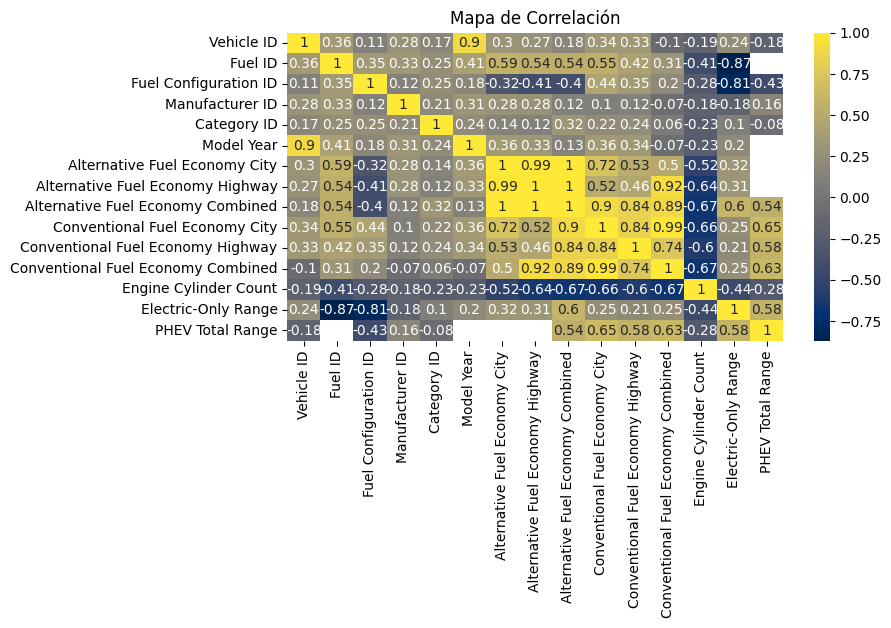

In [10]:
# Generamos un mapa con las correlaciones
dataNumerica = df_ligeros.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap="cividis", annot=True)
plt.title('Mapa de Correlación')
plt.show()

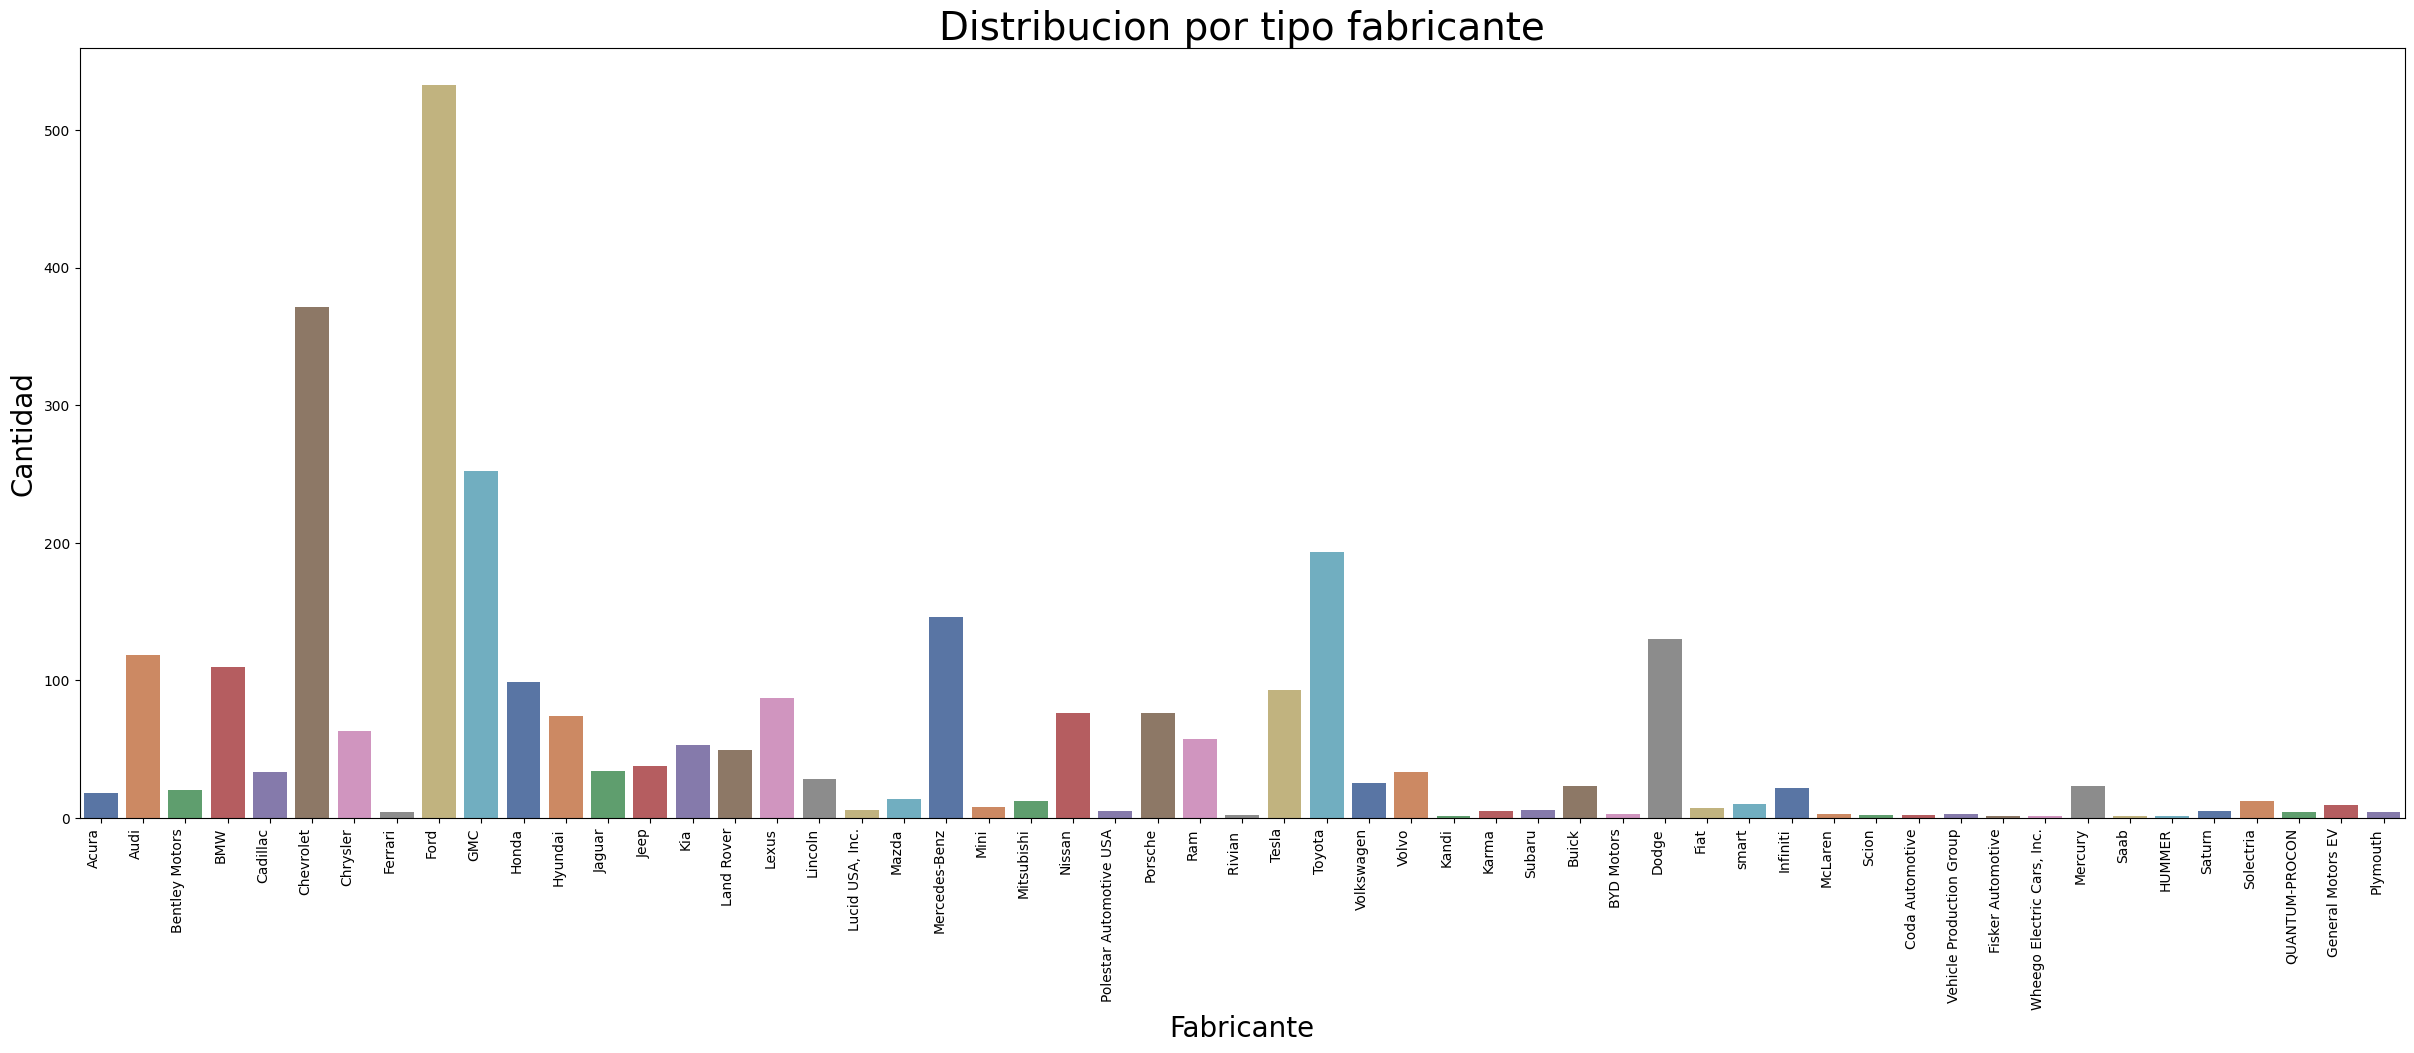

In [12]:
#Mostramos el nombre de los fabricantes de los vehiculos
plt.figure(figsize=(30, 10))
sns.countplot(x='Manufacturer', data=df_ligeros, palette='deep')
plt.title('Distribucion por tipo fabricante', fontsize=28)
plt.xlabel('Fabricante', fontsize=20)
plt.ylabel('Cantidad', fontsize=20)
plt.xticks(rotation=90, ha='right')
plt.show()

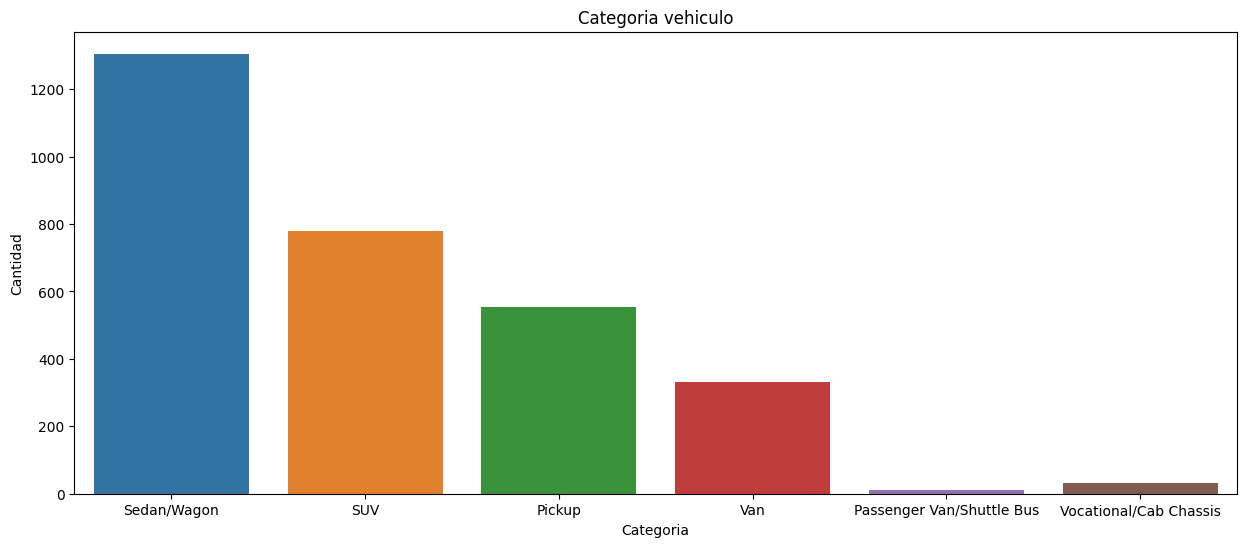

In [14]:
#analisamos la categoria de cada todos los vehiculos
plt.figure(figsize=(15, 6))
sns.countplot(x='Category', data=df_ligeros)
plt.title('Categoria vehiculo')
plt.xlabel('Categoria')
plt.ylabel('Cantidad')
plt.show()

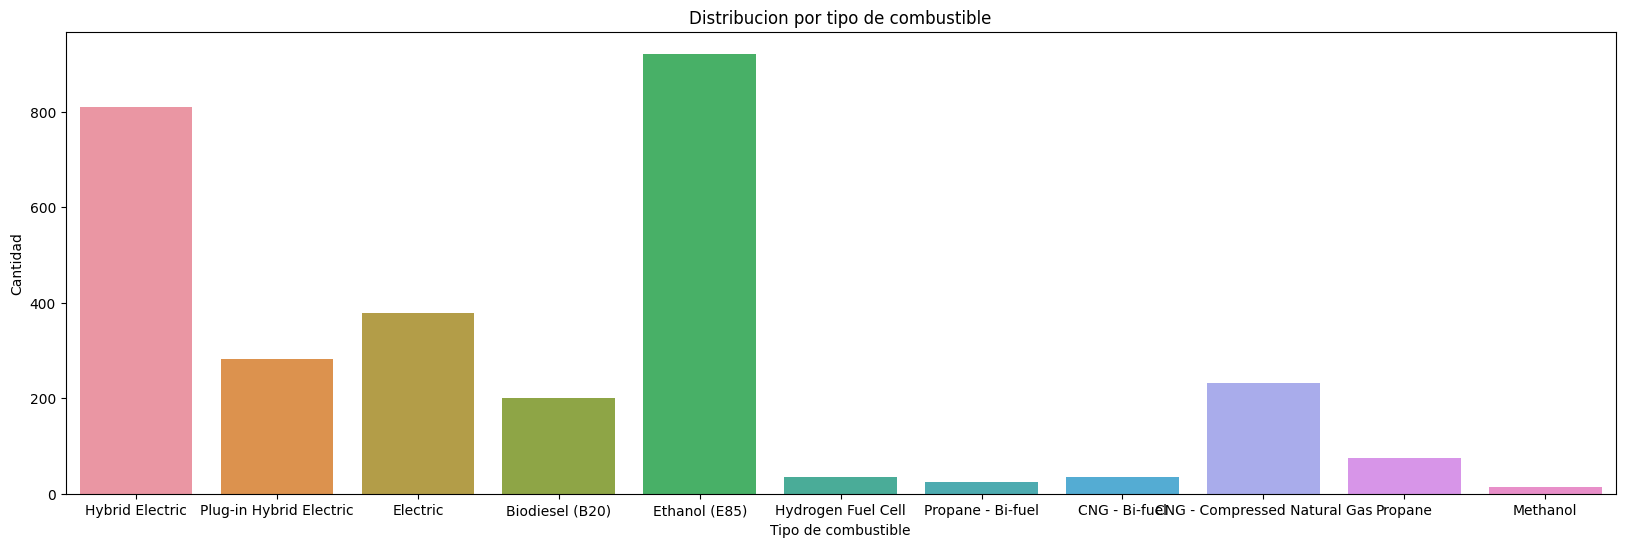

In [15]:
#Analisamos los vehiculos según tipo de combustible que consume
plt.figure(figsize=(20, 6))
sns.countplot(x='Fuel', data=df_ligeros)
plt.title('Distribucion por tipo de combustible')
plt.xlabel('Tipo de combustible')
plt.ylabel('Cantidad')
plt.show()

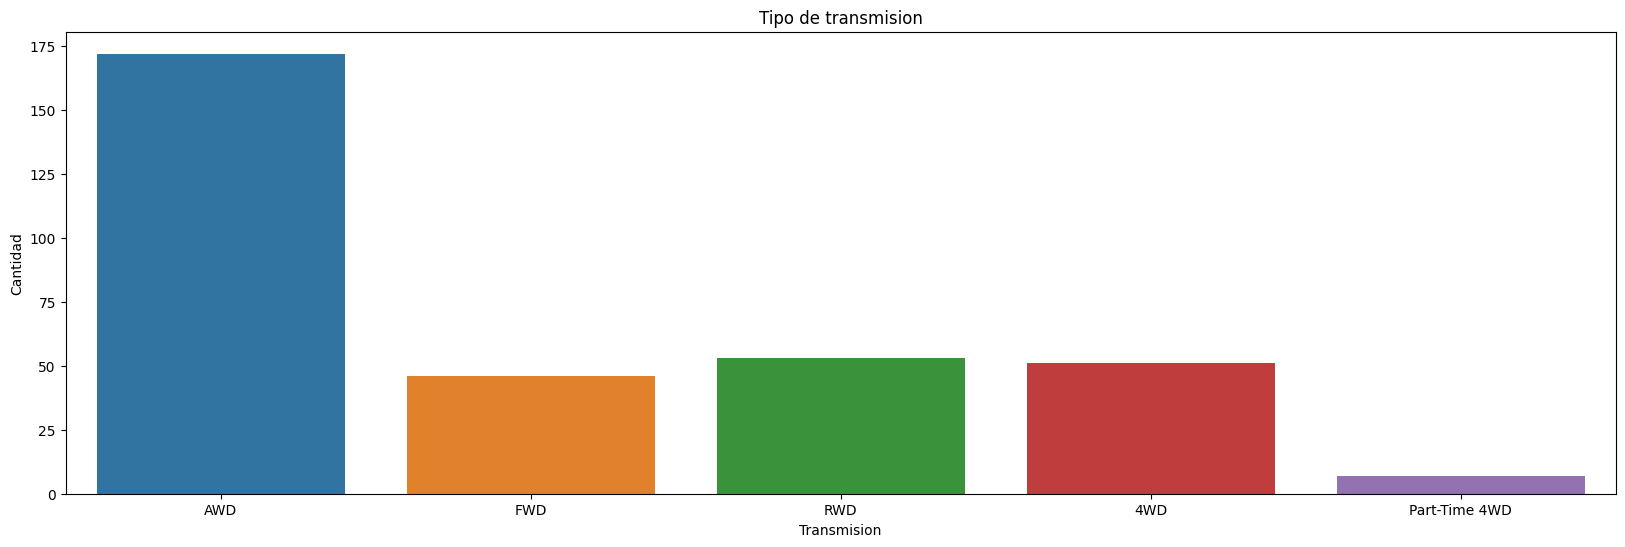

In [16]:
#Analisamos el tipo de transmision de estos vehiculos ligeros
plt.figure(figsize=(20, 6))
sns.countplot(x='Drivetrain', data=df_ligeros)
plt.title('Tipo de transmision')
plt.xlabel('Transmision')
plt.ylabel('Cantidad')
plt.show()